In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

#getting csvs
song_data = pd.read_csv("song_data.csv")
song_info = pd.read_csv("song_info.csv")

In [3]:
#merge data
total_data = pd.merge(song_data, song_info, left_index=True, right_index=True)
total_data.head()
#total_data["song_name"].value_counts()

,song_name_x,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_name_y,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [4]:
#basic cleaning of the merged dataframe
new_data = total_data.drop("album_names",1)
new_data = new_data.drop("playlist",1)
new_data = new_data.drop("song_name_y",1)
new_data = new_data.rename(columns={"song_name_x":"song_name"})
new_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Red Hot Chili Peppers
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Nickelback


In [13]:
# remove duplicates from song_data
b = pd.DataFrame(new_data)
b_clean = DataFrame.drop_duplicates(b)
b_clean.sort_values("song_popularity")
b_clean.head()
corr = b_clean.corr()
corr.style.background_gradient(cmap='PuOr')
#plt.matshow(b_clean.corr())
#c_clean = b_clean.sort_values("song_popularity", ascending = False)
#c_clean.head()
#c_clean=c_clean[c_clean.duplicated(subset="song_popularity",keep="first")].reset_index(drop="index")
#c_clean

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1,-0.00776572,-0.0316578,0.0564145,-0.0164682,-0.0930324,-0.00387769,-0.0385532,0.052114,0.00882404,-0.00197093,-0.02956,0.0233069,-0.0439626
song_duration_ms,-0.00776572,1,-0.113314,-0.0893385,0.0963754,-0.0248502,-0.00674927,0.0207572,0.0278373,-0.0280558,-0.0794383,0.0136079,0.00408042,-0.0697628
acousticness,-0.0316578,-0.113314,1,-0.171859,-0.679235,0.179259,-0.000632286,-0.0852422,-0.569681,0.0594434,-0.0854351,-0.144736,-0.15118,-0.126915
danceability,0.0564145,-0.0893385,-0.171859,1,0.0536574,-0.124926,0.00759866,-0.0943733,0.173495,-0.0990389,0.200715,-0.127313,0.136211,0.350012
energy,-0.0164682,0.0963754,-0.679235,0.0536574,1,-0.221755,0.0146532,0.175979,0.765706,-0.0490397,0.0721379,0.182517,0.143516,0.315023
instrumentalness,-0.0930324,-0.0248502,0.179259,-0.124926,-0.221755,1,-0.008496,-0.0398215,-0.398912,-0.0188521,-0.0767055,-0.0410321,-0.0686561,-0.197783
key,-0.00387769,-0.00674927,-0.000632286,0.00759866,0.0146532,-0.008496,1,-0.00325436,0.0080016,-0.174955,0.0285647,-0.00503327,-0.00875016,0.0236261
liveness,-0.0385532,0.0207572,-0.0852422,-0.0943733,0.175979,-0.0398215,-0.00325436,1,0.111716,-0.00172901,0.0942288,0.0256814,0.0147923,0.0165718
loudness,0.052114,0.0278373,-0.569681,0.173495,0.765706,-0.398912,0.0080016,0.111716,1,-0.0557925,0.0784176,0.140217,0.112596,0.209803
audio_mode,0.00882404,-0.0280558,0.0594434,-0.0990389,-0.0490397,-0.0188521,-0.174955,-0.00172901,-0.0557925,1,-0.110686,0.0218633,-0.0207893,0.00225365


Text(0, 0.5, 'Energy')

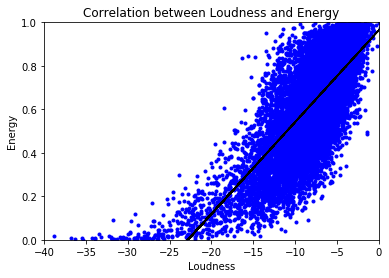

In [38]:
#energy and loudness seem to have 0.76 correlation above
#get correlations between LOUDNESS and ENERGY
x = b_clean["loudness"].values
y = b_clean["energy"].values

#x=x.reshape(x.shape[0],1)
#y=y.reshape(y.shape[0],1)

#plt.scatter(x,y)

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)

plt.plot(x,y,"b.",x,fit_fn(x),'--k')
plt.xlim(-40,0)
plt.ylim(0,1)

plt.title("Correlation between Loudness and Energy")
plt.xlabel("Loudness")
plt.ylabel("Energy")
#axes=plt.gca()
#m, b = np.polyfit(x,y,1)
#X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
#plt.plot(X_plot,m*X_plot + b,'y-')



Text(0, 0.5, 'Energy')

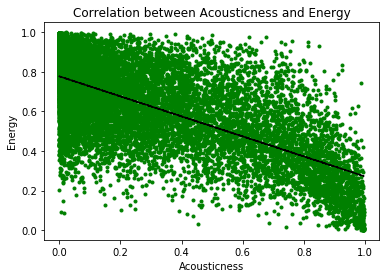

In [39]:
#correlations between ENERGY and ACOUSTICNESS
x = b_clean["acousticness"].values
y = b_clean["energy"].values

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)

plt.plot(x,y,"g.",x,fit_fn(x),'--k')
#plt.xlim(-40,0)
#plt.ylim(0,1)

plt.title("Correlation between Acousticness and Energy")
plt.xlabel("Acousticness")
plt.ylabel("Energy")

Text(0, 0.5, 'Loudness')

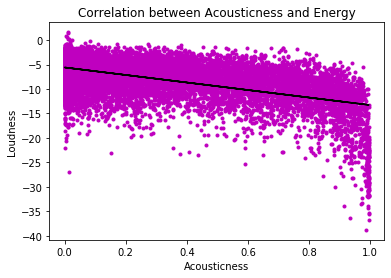

In [43]:
#correlations between LOUDNESS and ACOUSTICNESS
x = b_clean["acousticness"].values
y = b_clean["loudness"].values

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)

plt.plot(x,y,"m.",x,fit_fn(x),'-k')
#plt.xlim(-40,0)
#plt.ylim(0,1)

plt.title("Correlation between Acousticness and Energy")
plt.xlabel("Acousticness")
plt.ylabel("Loudness")